# Project Analysis

Importing the datasets from the previous project setup and creating plots for them

In [1]:
# Dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sportsreference.ncaab.roster import Player
from sportsreference.nba.roster import Roster

This is just importing the file we created in the project set up. Should be in the same directory.

In [2]:
nba_df = pd.read_csv("NBA_Data.csv")
ncaa_df = pd.read_csv("NCAA_Data.csv")

Because certain players had a place holder -999 for stats that weren't present, we can replace them with Nan values now in order to make sure they do not get plotted and also prevent them from skewing the data.

In [3]:
ncaa_df = ncaa_df.replace(-999.0, np.nan)
ncaa_df.head()

,Name,Career Height,Career Weight,Career Points,Career Games,Career Assists,Career Def Rebounds,Career Off Rebounds,Career Turnovers,Career Blocks,...,Defensive Win Shares,Career Usage Percentage,Box Plus Minus,True Shooting Per,PPG,APG,TPG,BPG,SPG,RPG
0,Bruno Fernando,82.0,240.0,770.0,64.0,89.0,413.0,145.0,148.0,101.0,...,3.8,23.1,8.1,0.638,12.031250,1.390625,2.312500,1.578125,0.515625,8.718750
1,John Collins,82.0,218.0,859.0,64.0,24.0,270.0,176.0,91.0,75.0,...,1.4,27.8,7.4,0.638,13.421875,0.375000,1.421875,1.171875,0.468750,6.968750
2,Brandon Goodwin,72.0,180.0,1651.0,126.0,477.0,396.0,116.0,290.0,11.0,...,4.3,24.1,2.2,0.563,13.103175,3.785714,2.301587,0.087302,1.087302,4.063492
3,Trae Young,74.0,180.0,876.0,32.0,279.0,111.0,14.0,167.0,8.0,...,1.1,37.1,11.1,0.585,27.375000,8.718750,5.218750,0.250000,1.687500,3.906250
4,Solomon Hill,79.0,220.0,1430.0,139.0,304.0,523.0,250.0,290.0,49.0,...,6.0,19.7,6.9,0.582,10.287770,2.187050,2.086331,0.352518,0.913669,5.561151


Finally this ensures that only names found in both datasets are included, and makes sure they are the same size. This is done again from the previous notebook as a failsafe, as if they do not share the same names list, the plot will not work.

In [4]:
nbanames = list(nba_df["Name"])
ncaa_df = ncaa_df[ncaa_df['Name'].isin(nbanames)]
ncaa_df = ncaa_df.reset_index(drop = True)

## Individual Stats Scatter Plots and Box Plots
This is where individual stats from each dataframe gets plotted, first with a scatterplot. Where the x-axis represents an NCAA statistic, and the y-axis represents the same player's statistic in the NBA. These statistics can vary, of course, as they are meant to represent how one statistic from college carries over to another in the NBA. 
Finally, a red horizontal line represents the average statistic from the NBA, and the vertical line represents the average statistic in the NCAA

When it comes to the bar plot, each player gets categorized into below average in college and above average in the NBA(- College + NBA), above average college and above average NBA (+ College + NBA), both in blue, and the opposite, (- College - NBA) and (+College - NBA) in red. Where the college stat is the one specified as the x-axis in the scatter plot, and the NBA stat is the y-axis is the corresponding NBA statistic.

#### NCAA height vs NBA Box Plus Minus

Box plus minus is a stat that tells how a player contributes to winning when the player is on the court. For example, a -3 indicates when the player was playing, the team was 3 points behind the oppenent. 

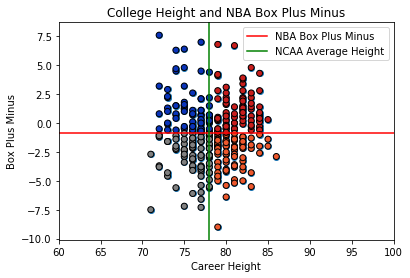

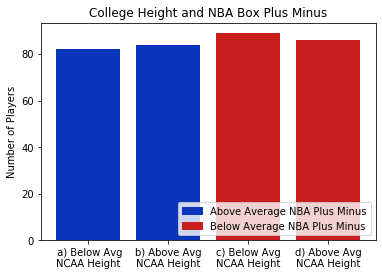

Average NCAA Height: 78.00879765395895 
Average NBA Box Plus Minus: -0.8859237536656892 


In [6]:
# x and y is specified here, as explained above. These come directly from the imported DataFrame
x = ncaa_df["Career Height"]
y = nba_df["Box Plus Minus"]
plt.scatter(x, y)
plt.xlabel("Career Height")
plt.ylabel("Box Plus Minus")
# these average lines are to plot on the scatterplot, as well as to compare to in the boxplot
averageliney = nba_df["Box Plus Minus"].mean()
averagelinex = ncaa_df["Career Height"].mean()
plt.axhline(y=averageliney, color='r', linestyle='-', label = "NBA Box Plus Minus")
plt.axvline(x=averagelinex, color='g', linestyle='-', label = 'NCAA Average Height')
means = []
color = []
# colorizing each player based on how they compare to the average, also adding to the means count to plot the box plot
for item1, item2 in zip(list(x), list(y)):
    if(item1 > averagelinex and item2 > averageliney):
        color.append('#C81E1D')
        means.append(2)
    elif(item1 > averagelinex and item2 < averageliney):
        color.append('#ED582D')
        means.append(4)
    elif(item1 < averagelinex and item2 > averageliney):
        color.append('#0A34BB')
        means.append(1)
    else:
        color.append('gray')
        means.append(3)
plt.scatter(x, y, c = color, edgecolor= 'black')
plt.legend()
plt.title("College Height and NBA Box Plus Minus")
plt.xlim([60, 100])
plt.savefig('ProjectPlots/heightvsboxplusminusScatter.png')
plt.show()
# This is now for the box plot, looking at the means count and displaying how many fit in each category
names = [' a) Below Avg\nNCAA Height', 'b) Above Avg\nNCAA Height', 'c) Below Avg\nNCAA Height', 'd) Above Avg\nNCAA Height' ]
barcolor = ['#0A34BB', '#0A34BB', '#C81E1D', '#C81E1D']
plt.bar(names, [means.count(1), means.count(2), means.count(3), means.count(4)], color = barcolor)
plt.title("College Height and NBA Box Plus Minus")
plt.ylabel("Number of Players")
blue_patch = mpatches.Patch(color='#0A34BB', label='Above Average NBA Plus Minus')
red_patch = mpatches.Patch(color='#C81E1D', label='Below Average NBA Plus Minus')
plt.legend(handles=[blue_patch, red_patch], loc = 'lower right')
plt.savefig('ProjectPlots/heightvsboxplusminusBar.png')
plt.show()
print(f"Average NCAA Height: {averagelinex} ")
print(f"Average NBA Box Plus Minus: {averageliney} ")

#### NCAA weight vs NBA Box Plus Minus

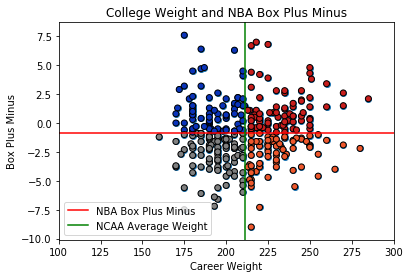

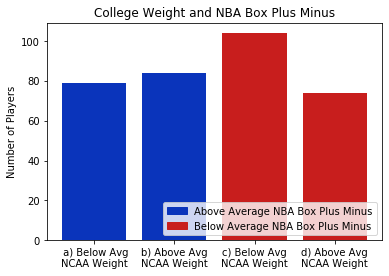

College Average:  211.32132132132134
NBA Average:  -0.8859237536656892


In [7]:
# this follows the exact format as before, only changing the statistic to plot
x = ncaa_df["Career Weight"]
y = nba_df["Box Plus Minus"]
plt.scatter(x, y)
plt.xlabel("Career Weight")
plt.ylabel("Box Plus Minus")
averageliney = nba_df["Box Plus Minus"].mean()
averagelinex = ncaa_df["Career Weight"].mean()

plt.axhline(y=averageliney, color='r', linestyle='-', label = "NBA Box Plus Minus")
plt.axvline(x=averagelinex, color='g', linestyle='-', label = 'NCAA Average Weight')

means = []
color = []
for item1, item2 in zip(list(x), list(y)):
    if(item1 > averagelinex and item2 > averageliney):
        color.append('#C81E1D')
        means.append(2)
    elif(item1 > averagelinex and item2 < averageliney):
        color.append('#ED582D')
        means.append(4)
    elif(item1 < averagelinex and item2 > averageliney):
        color.append('#0A34BB')
        means.append(1)
    else:
        color.append('gray')
        means.append(3)
plt.scatter(x, y, c = color, edgecolor= 'black')
plt.legend()
plt.title("College Weight and NBA Box Plus Minus")
plt.xlim([100, 300])

plt.savefig('ProjectPlots/weightvsboxplusminusScatter.png')
plt.show()

# names = ['- College\n+ NBA', '+ College\n+ NBA', '- College\n- NBA', '+ College\n- NBA' ]
names = [' a) Below Avg\nNCAA Weight', 'b) Above Avg\nNCAA Weight', 'c) Below Avg\nNCAA Weight', 'd) Above Avg\nNCAA Weight' ]
barcolor = ['#0A34BB', '#0A34BB', '#C81E1D', '#C81E1D']
plt.bar(names, [means.count(1), means.count(2), means.count(3), means.count(4)], color = barcolor)

plt.title("College Weight and NBA Box Plus Minus")
plt.ylabel("Number of Players")

blue_patch = mpatches.Patch(color='#0A34BB', label='Above Average NBA Box Plus Minus')
red_patch = mpatches.Patch(color='#C81E1D', label='Below Average NBA Box Plus Minus')
plt.legend(handles=[blue_patch, red_patch], loc = 'lower right')
plt.savefig('ProjectPlots/weightvsboxplusminusBar.png')
plt.show()
print("College Average: ",averagelinex)
print("NBA Average: ",averageliney)